In [1]:
import numpy as np # linear algebra
#import pandas as pd 
import os
import cv2
from time import sleep
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, MaxPooling2D, Activation
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as k
import re
from glob import glob
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.


In [2]:
norm_path = 'chest_xray/{}/NORMAL'
pneumonia_path = 'chest_xray/{}/PNEUMONIA'

In [3]:
imagePath = glob('chest_xray/test/**/*.jpeg')
imagePath

['chest_xray/test\\NORMAL\\normal_100.jpeg',
 'chest_xray/test\\NORMAL\\normal_101.jpeg',
 'chest_xray/test\\NORMAL\\normal_102.jpeg',
 'chest_xray/test\\NORMAL\\normal_103.jpeg',
 'chest_xray/test\\NORMAL\\normal_104.jpeg',
 'chest_xray/test\\NORMAL\\normal_105.jpeg',
 'chest_xray/test\\NORMAL\\normal_106.jpeg',
 'chest_xray/test\\NORMAL\\normal_107.jpeg',
 'chest_xray/test\\NORMAL\\normal_108.jpeg',
 'chest_xray/test\\NORMAL\\normal_109.jpeg',
 'chest_xray/test\\NORMAL\\normal_11.jpeg',
 'chest_xray/test\\NORMAL\\normal_110.jpeg',
 'chest_xray/test\\NORMAL\\normal_111.jpeg',
 'chest_xray/test\\NORMAL\\normal_112.jpeg',
 'chest_xray/test\\NORMAL\\normal_114.jpeg',
 'chest_xray/test\\NORMAL\\normal_115.jpeg',
 'chest_xray/test\\NORMAL\\normal_116.jpeg',
 'chest_xray/test\\NORMAL\\normal_118.jpeg',
 'chest_xray/test\\NORMAL\\normal_119.jpeg',
 'chest_xray/test\\NORMAL\\normal_120.jpeg',
 'chest_xray/test\\NORMAL\\normal_121.jpeg',
 'chest_xray/test\\NORMAL\\normal_122.jpeg',
 'chest_xra

In [11]:
x = []
y = []
virus_pattern = re.compile('_virus_')
bacteria_pattern = re.compile('_bacteria_')
for img in tqdm(imagePath):
    try:
        print (img)
        im = cv2.imread(img)
        x.append(cv2.resize(im, (224,224), interpolation = cv2.INTER_CUBIC))
        if virus_pattern.search(img) != None:
            y.append(0)
        elif bacteria_pattern.search(img) != None:
            y.append(1)
    except Exception as e:
        print (e)
        

chest_xray/test\NORMAL\normal_100.jpeg
chest_xray/test\NORMAL\normal_101.jpeg
chest_xray/test\NORMAL\normal_102.jpeg
chest_xray/test\NORMAL\normal_103.jpeg
chest_xray/test\NORMAL\normal_104.jpeg
chest_xray/test\NORMAL\normal_105.jpeg
chest_xray/test\NORMAL\normal_106.jpeg
chest_xray/test\NORMAL\normal_107.jpeg
chest_xray/test\NORMAL\normal_108.jpeg
chest_xray/test\NORMAL\normal_109.jpeg
chest_xray/test\NORMAL\normal_11.jpeg
chest_xray/test\NORMAL\normal_110.jpeg
chest_xray/test\NORMAL\normal_111.jpeg
chest_xray/test\NORMAL\normal_112.jpeg
chest_xray/test\NORMAL\normal_114.jpeg
chest_xray/test\NORMAL\normal_115.jpeg
chest_xray/test\NORMAL\normal_116.jpeg
chest_xray/test\NORMAL\normal_118.jpeg
chest_xray/test\NORMAL\normal_119.jpeg
chest_xray/test\NORMAL\normal_120.jpeg
chest_xray/test\NORMAL\normal_121.jpeg
chest_xray/test\NORMAL\normal_122.jpeg
chest_xray/test\NORMAL\normal_123.jpeg
chest_xray/test\NORMAL\normal_124.jpeg
chest_xray/test\NORMAL\normal_125.jpeg
chest_xray/test\NORMAL\nor

chest_xray/test\PNEUMONIA\person1_virus_8.jpeg
chest_xray/test\PNEUMONIA\person1_virus_9.jpeg
chest_xray/test\PNEUMONIA\person20_virus_51.jpeg
chest_xray/test\PNEUMONIA\person21_virus_52.jpeg
chest_xray/test\PNEUMONIA\person21_virus_53.jpeg
chest_xray/test\PNEUMONIA\person22_virus_54.jpeg
chest_xray/test\PNEUMONIA\person22_virus_55.jpeg
chest_xray/test\PNEUMONIA\person23_virus_56.jpeg
chest_xray/test\PNEUMONIA\person24_virus_58.jpeg
chest_xray/test\PNEUMONIA\person25_virus_59.jpeg
chest_xray/test\PNEUMONIA\person26_virus_60.jpeg
chest_xray/test\PNEUMONIA\person28_virus_62.jpeg
chest_xray/test\PNEUMONIA\person28_virus_63.jpeg
chest_xray/test\PNEUMONIA\person29_virus_64.jpeg
chest_xray/test\PNEUMONIA\person30_virus_69.jpeg
chest_xray/test\PNEUMONIA\person31_virus_70.jpeg
chest_xray/test\PNEUMONIA\person32_virus_71.jpeg
chest_xray/test\PNEUMONIA\person33_virus_72.jpeg
chest_xray/test\PNEUMONIA\person34_virus_76.jpeg
chest_xray/test\PNEUMONIA\person35_virus_80.jpeg
chest_xray/test\PNEUMONI

In [5]:
x = np.array(x)
y = np.array(y)

In [ ]:
set(y)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101)
y_train = to_categorical(y_train, num_classes = 2)
y_valid = to_categorical(y_valid, num_classes = 2)
del x, y

ValueError: Found input variables with inconsistent numbers of samples: [456, 390]

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
model = Sequential()
model.add(Conv2D(32,(7,7),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(GlobalAveragePooling2D())
model.add(Dense(1000, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [10]:
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm
mcp = ModelCheckpoint(filepath='model_multiclass.hdf5',monitor="val_acc", save_best_only=True, save_weights_only=False)
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 40, verbose=1,  validation_split=0.2, callbacks=[mcp])

Train on 2480 samples, validate on 620 samples
Epoch 1/40
2480/2480 [==============================] - ETA: 5:30 - loss: 0.6843 - acc: 0.500 - ETA: 2:53 - loss: 0.7504 - acc: 0.500 - ETA: 2:01 - loss: 0.7131 - acc: 0.562 - ETA: 1:35 - loss: 0.7226 - acc: 0.539 - ETA: 1:19 - loss: 0.7023 - acc: 0.581 - ETA: 1:08 - loss: 0.6838 - acc: 0.599 - ETA: 1:00 - loss: 0.6925 - acc: 0.598 - ETA: 55s - loss: 0.6752 - acc: 0.621 - ETA: 50s - loss: 0.6797 - acc: 0.62 - ETA: 46s - loss: 0.6853 - acc: 0.62 - ETA: 43s - loss: 0.6831 - acc: 0.62 - ETA: 40s - loss: 0.6826 - acc: 0.62 - ETA: 38s - loss: 0.6810 - acc: 0.62 - ETA: 36s - loss: 0.6844 - acc: 0.62 - ETA: 34s - loss: 0.6854 - acc: 0.62 - ETA: 33s - loss: 0.6792 - acc: 0.62 - ETA: 31s - loss: 0.6767 - acc: 0.62 - ETA: 30s - loss: 0.6766 - acc: 0.62 - ETA: 29s - loss: 0.6747 - acc: 0.62 - ETA: 28s - loss: 0.6683 - acc: 0.63 - ETA: 27s - loss: 0.6676 - acc: 0.63 - ETA: 26s - loss: 0.6693 - acc: 0.63 - ETA: 25s - loss: 0.6717 - acc: 0.63 - ETA: 24s

2480/2480 [==============================] - ETA: 21s - loss: 0.4799 - acc: 0.84 - ETA: 21s - loss: 0.5254 - acc: 0.78 - ETA: 21s - loss: 0.5593 - acc: 0.75 - ETA: 20s - loss: 0.5562 - acc: 0.75 - ETA: 20s - loss: 0.5577 - acc: 0.75 - ETA: 20s - loss: 0.5839 - acc: 0.73 - ETA: 20s - loss: 0.5733 - acc: 0.73 - ETA: 19s - loss: 0.5589 - acc: 0.75 - ETA: 19s - loss: 0.5568 - acc: 0.75 - ETA: 19s - loss: 0.5655 - acc: 0.75 - ETA: 18s - loss: 0.5539 - acc: 0.76 - ETA: 18s - loss: 0.5540 - acc: 0.75 - ETA: 18s - loss: 0.5670 - acc: 0.75 - ETA: 18s - loss: 0.5748 - acc: 0.74 - ETA: 17s - loss: 0.5766 - acc: 0.74 - ETA: 17s - loss: 0.5720 - acc: 0.74 - ETA: 17s - loss: 0.5722 - acc: 0.74 - ETA: 16s - loss: 0.5686 - acc: 0.74 - ETA: 16s - loss: 0.5713 - acc: 0.74 - ETA: 16s - loss: 0.5702 - acc: 0.74 - ETA: 16s - loss: 0.5677 - acc: 0.74 - ETA: 15s - loss: 0.5673 - acc: 0.74 - ETA: 15s - loss: 0.5629 - acc: 0.74 - ETA: 15s - loss: 0.5613 - acc: 0.74 - ETA: 14s - loss: 0.5598 - acc: 0.74 - ETA: 

2480/2480 [==============================] - ETA: 21s - loss: 0.4031 - acc: 0.81 - ETA: 21s - loss: 0.4540 - acc: 0.79 - ETA: 21s - loss: 0.4562 - acc: 0.80 - ETA: 20s - loss: 0.4312 - acc: 0.82 - ETA: 20s - loss: 0.4249 - acc: 0.83 - ETA: 20s - loss: 0.4260 - acc: 0.82 - ETA: 20s - loss: 0.4489 - acc: 0.81 - ETA: 19s - loss: 0.4425 - acc: 0.81 - ETA: 19s - loss: 0.4462 - acc: 0.80 - ETA: 19s - loss: 0.4509 - acc: 0.80 - ETA: 18s - loss: 0.4449 - acc: 0.80 - ETA: 18s - loss: 0.4367 - acc: 0.81 - ETA: 18s - loss: 0.4442 - acc: 0.81 - ETA: 18s - loss: 0.4411 - acc: 0.81 - ETA: 17s - loss: 0.4336 - acc: 0.82 - ETA: 17s - loss: 0.4455 - acc: 0.81 - ETA: 17s - loss: 0.4573 - acc: 0.80 - ETA: 17s - loss: 0.4741 - acc: 0.79 - ETA: 16s - loss: 0.5000 - acc: 0.77 - ETA: 16s - loss: 0.4961 - acc: 0.78 - ETA: 16s - loss: 0.5030 - acc: 0.77 - ETA: 15s - loss: 0.4967 - acc: 0.77 - ETA: 15s - loss: 0.5000 - acc: 0.77 - ETA: 15s - loss: 0.5077 - acc: 0.76 - ETA: 15s - loss: 0.5098 - acc: 0.76 - ETA: 

2480/2480 [==============================] - ETA: 21s - loss: 0.4491 - acc: 0.81 - ETA: 21s - loss: 0.5124 - acc: 0.73 - ETA: 21s - loss: 0.5667 - acc: 0.68 - ETA: 20s - loss: 0.5183 - acc: 0.71 - ETA: 20s - loss: 0.5150 - acc: 0.72 - ETA: 20s - loss: 0.5223 - acc: 0.72 - ETA: 20s - loss: 0.5149 - acc: 0.74 - ETA: 19s - loss: 0.4963 - acc: 0.75 - ETA: 19s - loss: 0.4946 - acc: 0.75 - ETA: 19s - loss: 0.4977 - acc: 0.75 - ETA: 18s - loss: 0.4932 - acc: 0.75 - ETA: 18s - loss: 0.4860 - acc: 0.75 - ETA: 18s - loss: 0.4774 - acc: 0.76 - ETA: 18s - loss: 0.4864 - acc: 0.75 - ETA: 17s - loss: 0.5022 - acc: 0.74 - ETA: 17s - loss: 0.4987 - acc: 0.75 - ETA: 17s - loss: 0.5001 - acc: 0.75 - ETA: 17s - loss: 0.4933 - acc: 0.75 - ETA: 16s - loss: 0.4898 - acc: 0.75 - ETA: 16s - loss: 0.4845 - acc: 0.75 - ETA: 16s - loss: 0.4783 - acc: 0.76 - ETA: 15s - loss: 0.4769 - acc: 0.76 - ETA: 15s - loss: 0.4719 - acc: 0.77 - ETA: 15s - loss: 0.4765 - acc: 0.76 - ETA: 15s - loss: 0.4815 - acc: 0.76 - ETA: 

2480/2480 [==============================] - ETA: 21s - loss: 0.4758 - acc: 0.78 - ETA: 21s - loss: 0.4261 - acc: 0.84 - ETA: 21s - loss: 0.4485 - acc: 0.82 - ETA: 20s - loss: 0.4530 - acc: 0.80 - ETA: 20s - loss: 0.4705 - acc: 0.79 - ETA: 20s - loss: 0.4796 - acc: 0.77 - ETA: 20s - loss: 0.4869 - acc: 0.75 - ETA: 19s - loss: 0.4785 - acc: 0.75 - ETA: 19s - loss: 0.4823 - acc: 0.75 - ETA: 19s - loss: 0.4854 - acc: 0.75 - ETA: 18s - loss: 0.4944 - acc: 0.75 - ETA: 18s - loss: 0.5073 - acc: 0.74 - ETA: 18s - loss: 0.5041 - acc: 0.74 - ETA: 18s - loss: 0.5065 - acc: 0.74 - ETA: 17s - loss: 0.5033 - acc: 0.75 - ETA: 17s - loss: 0.5015 - acc: 0.75 - ETA: 17s - loss: 0.5001 - acc: 0.75 - ETA: 16s - loss: 0.4950 - acc: 0.76 - ETA: 16s - loss: 0.4967 - acc: 0.76 - ETA: 16s - loss: 0.4940 - acc: 0.76 - ETA: 16s - loss: 0.4883 - acc: 0.77 - ETA: 15s - loss: 0.4847 - acc: 0.77 - ETA: 15s - loss: 0.4848 - acc: 0.77 - ETA: 15s - loss: 0.4791 - acc: 0.78 - ETA: 14s - loss: 0.4844 - acc: 0.77 - ETA: 

2480/2480 [==============================] - ETA: 21s - loss: 0.6930 - acc: 0.56 - ETA: 21s - loss: 0.5526 - acc: 0.68 - ETA: 21s - loss: 0.5144 - acc: 0.71 - ETA: 21s - loss: 0.5273 - acc: 0.71 - ETA: 20s - loss: 0.5251 - acc: 0.71 - ETA: 20s - loss: 0.5066 - acc: 0.72 - ETA: 20s - loss: 0.5039 - acc: 0.72 - ETA: 19s - loss: 0.4907 - acc: 0.73 - ETA: 19s - loss: 0.4873 - acc: 0.73 - ETA: 19s - loss: 0.4732 - acc: 0.75 - ETA: 19s - loss: 0.4610 - acc: 0.76 - ETA: 18s - loss: 0.4581 - acc: 0.76 - ETA: 18s - loss: 0.4511 - acc: 0.77 - ETA: 18s - loss: 0.4501 - acc: 0.77 - ETA: 17s - loss: 0.4494 - acc: 0.77 - ETA: 17s - loss: 0.4408 - acc: 0.78 - ETA: 17s - loss: 0.4344 - acc: 0.78 - ETA: 17s - loss: 0.4371 - acc: 0.78 - ETA: 16s - loss: 0.4457 - acc: 0.77 - ETA: 16s - loss: 0.4417 - acc: 0.77 - ETA: 16s - loss: 0.4467 - acc: 0.77 - ETA: 15s - loss: 0.4536 - acc: 0.77 - ETA: 15s - loss: 0.4541 - acc: 0.77 - ETA: 15s - loss: 0.4498 - acc: 0.77 - ETA: 15s - loss: 0.4506 - acc: 0.77 - ETA: 

2480/2480 [==============================] - ETA: 21s - loss: 0.4100 - acc: 0.84 - ETA: 21s - loss: 0.3910 - acc: 0.82 - ETA: 21s - loss: 0.3762 - acc: 0.83 - ETA: 20s - loss: 0.3604 - acc: 0.85 - ETA: 20s - loss: 0.3460 - acc: 0.86 - ETA: 20s - loss: 0.3616 - acc: 0.85 - ETA: 20s - loss: 0.3610 - acc: 0.84 - ETA: 19s - loss: 0.3800 - acc: 0.83 - ETA: 19s - loss: 0.3824 - acc: 0.82 - ETA: 19s - loss: 0.3883 - acc: 0.81 - ETA: 18s - loss: 0.3962 - acc: 0.81 - ETA: 18s - loss: 0.4065 - acc: 0.81 - ETA: 18s - loss: 0.4111 - acc: 0.81 - ETA: 18s - loss: 0.4213 - acc: 0.80 - ETA: 17s - loss: 0.4223 - acc: 0.80 - ETA: 17s - loss: 0.4322 - acc: 0.78 - ETA: 17s - loss: 0.4255 - acc: 0.79 - ETA: 16s - loss: 0.4261 - acc: 0.78 - ETA: 16s - loss: 0.4336 - acc: 0.78 - ETA: 16s - loss: 0.4366 - acc: 0.78 - ETA: 16s - loss: 0.4335 - acc: 0.78 - ETA: 15s - loss: 0.4263 - acc: 0.79 - ETA: 15s - loss: 0.4242 - acc: 0.79 - ETA: 15s - loss: 0.4332 - acc: 0.79 - ETA: 14s - loss: 0.4313 - acc: 0.78 - ETA: 

2480/2480 [==============================] - ETA: 21s - loss: 0.5105 - acc: 0.78 - ETA: 21s - loss: 0.4361 - acc: 0.78 - ETA: 21s - loss: 0.4683 - acc: 0.75 - ETA: 20s - loss: 0.4327 - acc: 0.76 - ETA: 20s - loss: 0.4086 - acc: 0.78 - ETA: 20s - loss: 0.3838 - acc: 0.81 - ETA: 20s - loss: 0.3885 - acc: 0.80 - ETA: 19s - loss: 0.3819 - acc: 0.81 - ETA: 19s - loss: 0.3711 - acc: 0.82 - ETA: 19s - loss: 0.3903 - acc: 0.82 - ETA: 19s - loss: 0.3785 - acc: 0.82 - ETA: 18s - loss: 0.3817 - acc: 0.82 - ETA: 18s - loss: 0.3742 - acc: 0.82 - ETA: 18s - loss: 0.3918 - acc: 0.81 - ETA: 17s - loss: 0.3904 - acc: 0.81 - ETA: 17s - loss: 0.3921 - acc: 0.81 - ETA: 17s - loss: 0.3960 - acc: 0.81 - ETA: 17s - loss: 0.3929 - acc: 0.82 - ETA: 16s - loss: 0.3864 - acc: 0.82 - ETA: 16s - loss: 0.3853 - acc: 0.82 - ETA: 16s - loss: 0.3889 - acc: 0.81 - ETA: 15s - loss: 0.3912 - acc: 0.81 - ETA: 15s - loss: 0.3899 - acc: 0.81 - ETA: 15s - loss: 0.3872 - acc: 0.81 - ETA: 15s - loss: 0.3879 - acc: 0.81 - ETA: 

2480/2480 [==============================] - ETA: 21s - loss: 0.4112 - acc: 0.84 - ETA: 21s - loss: 0.3297 - acc: 0.87 - ETA: 21s - loss: 0.3446 - acc: 0.87 - ETA: 20s - loss: 0.3203 - acc: 0.87 - ETA: 20s - loss: 0.3027 - acc: 0.87 - ETA: 20s - loss: 0.3002 - acc: 0.86 - ETA: 20s - loss: 0.2939 - acc: 0.87 - ETA: 19s - loss: 0.2846 - acc: 0.87 - ETA: 19s - loss: 0.2895 - acc: 0.87 - ETA: 19s - loss: 0.2864 - acc: 0.87 - ETA: 18s - loss: 0.2910 - acc: 0.86 - ETA: 18s - loss: 0.2999 - acc: 0.85 - ETA: 18s - loss: 0.3006 - acc: 0.86 - ETA: 18s - loss: 0.3024 - acc: 0.85 - ETA: 17s - loss: 0.2987 - acc: 0.85 - ETA: 17s - loss: 0.3140 - acc: 0.84 - ETA: 17s - loss: 0.3108 - acc: 0.84 - ETA: 16s - loss: 0.3065 - acc: 0.85 - ETA: 16s - loss: 0.3113 - acc: 0.84 - ETA: 16s - loss: 0.3129 - acc: 0.85 - ETA: 16s - loss: 0.3068 - acc: 0.85 - ETA: 15s - loss: 0.3075 - acc: 0.85 - ETA: 15s - loss: 0.3069 - acc: 0.85 - ETA: 15s - loss: 0.3076 - acc: 0.85 - ETA: 15s - loss: 0.3068 - acc: 0.85 - ETA: 

2480/2480 [==============================] - ETA: 21s - loss: 0.1963 - acc: 0.96 - ETA: 21s - loss: 0.2993 - acc: 0.92 - ETA: 21s - loss: 0.3650 - acc: 0.87 - ETA: 20s - loss: 0.3587 - acc: 0.87 - ETA: 20s - loss: 0.3414 - acc: 0.87 - ETA: 20s - loss: 0.3369 - acc: 0.87 - ETA: 20s - loss: 0.3257 - acc: 0.87 - ETA: 19s - loss: 0.3497 - acc: 0.86 - ETA: 19s - loss: 0.3319 - acc: 0.87 - ETA: 19s - loss: 0.3290 - acc: 0.87 - ETA: 19s - loss: 0.3270 - acc: 0.88 - ETA: 18s - loss: 0.3216 - acc: 0.88 - ETA: 18s - loss: 0.3133 - acc: 0.88 - ETA: 18s - loss: 0.3083 - acc: 0.88 - ETA: 17s - loss: 0.3047 - acc: 0.88 - ETA: 17s - loss: 0.3029 - acc: 0.88 - ETA: 17s - loss: 0.2999 - acc: 0.89 - ETA: 17s - loss: 0.2972 - acc: 0.89 - ETA: 16s - loss: 0.2938 - acc: 0.88 - ETA: 16s - loss: 0.2911 - acc: 0.88 - ETA: 16s - loss: 0.2942 - acc: 0.88 - ETA: 15s - loss: 0.2992 - acc: 0.88 - ETA: 15s - loss: 0.3010 - acc: 0.88 - ETA: 15s - loss: 0.3008 - acc: 0.88 - ETA: 15s - loss: 0.2991 - acc: 0.88 - ETA: 

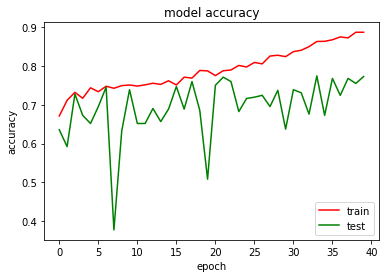

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 105, 64)      51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 52, 52, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 52, 52, 64)        256       
__________

In [14]:
from keras.models import load_model

In [32]:
model = pickle.load(open('pred_model.pkl', 'rb'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 105, 105, 64)      51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 52, 52, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 52, 52, 64)        256       
__________

In [29]:
def predict(img_path):
    x = []
    for img in img_path:
        im = cv2.imread(img)
        x.append((cv2.resize(im, (224,224), interpolation = cv2.INTER_CUBIC)))
    x = np.array(x)
    return model.predict(x)

In [30]:
predict([norm_path.format('test') + '/normal_9.jpeg'])

array([[3.5983822e-01, 3.8842252e-04, 6.3977331e-01]], dtype=float32)

In [15]:
pred = model.predict(x_valid)

In [16]:
from sklearn.metrics import classification_report
pred = model.predict(x_valid)
print(classification_report(np.argmax(y_valid, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       254
           1       0.80      0.85      0.83       521

   micro avg       0.76      0.76      0.76       775
   macro avg       0.73      0.71      0.72       775
weighted avg       0.76      0.76      0.76       775



In [1]:
def plot_confusion_matrix(cm,
                          
                          target_names,
                          
                          title='Confusion matrix',
                          
                          cmap=None,
                          
                          normalize=True):
    
    import matplotlib.pyplot as plt
    
    import numpy as np
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    
    misclass = 1 - accuracy

    if cmap is None:
    
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    
    plt.grid(b=False)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    
    plt.colorbar()

    if target_names is not None:
  
        tick_marks = np.arange(len(target_names))
        
        plt.xticks(tick_marks, target_names, rotation=45)
        
        plt.yticks(tick_marks, target_names)
    
    if normalize:
    
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    
        if normalize:
        
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
            
                     horizontalalignment="center",
                     
                     color="white" if cm[i, j] > thresh else "black")
        
        else:
        
            plt.text(j, i, "{:,}".format(cm[i, j]),
            
                     horizontalalignment="center",
                     
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    
    plt.ylabel('True label')
    
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    plt.show()

In [2]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_valid, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap ='Reds',
                      target_names = ['0','1'],
                      title        = "Confusion Matrix")

NameError: name 'np' is not defined

In [19]:
import pickle

with open('virus_bacteria.pkl', 'wb') as f:
    pickle.dump(f, model)
    f.close()

TypeError: file must have a 'write' attribute

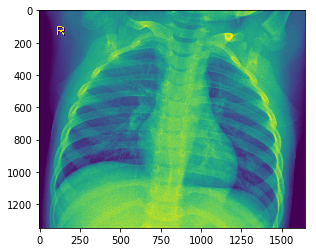

In [14]:
im = plt.imread('chest_xray//test\\NORMAL\\normal_100.jpeg')
plt.imshow(im)

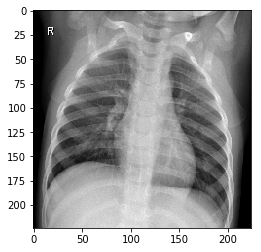

In [6]:
plt.imshow(x[0]) ## Transformed Image